# Importing modules

In [127]:
from ucimlrepo import fetch_ucirepo

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Get dataset from UCI repository

In [128]:
# fetch dataset 
dow_jones_index = fetch_ucirepo(id=312)
#Brown,Michael. (2014). Dow Jones Index. UCI Machine Learning Repository. https://doi.org/10.24432/C5788V.
  
# data (as pandas dataframes) 
df = dow_jones_index.data.features

In [129]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,54,0.594786


In [130]:
df.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'days_to_next_dividend', 'percent_return_next_dividend'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

## Extract the attributes that we consider most important

In [132]:
#attributes_of_interest = ['quarter', 'stock', 'open', 'high', 'low', 'close', 'volume', 'percent_return_next_dividend']
attributes_of_interest = ['quarter', 'stock', 'open', 'high', 'low', 'close', 'volume', 'percent_change_price', 'next_weeks_open', 'next_weeks_close', 'percent_return_next_dividend']
df_filter = df[attributes_of_interest]
df_filter.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,next_weeks_open,next_weeks_close,percent_return_next_dividend
0,1,AA,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,$16.71,$15.97,0.182704
1,1,AA,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,$16.19,$15.79,0.187852
2,1,AA,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,$15.87,$16.13,0.189994
3,1,AA,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,$16.18,$17.14,0.185989
4,1,AA,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,$17.33,$17.37,0.175029


In [133]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   quarter                       750 non-null    int64  
 1   stock                         750 non-null    object 
 2   open                          750 non-null    object 
 3   high                          750 non-null    object 
 4   low                           750 non-null    object 
 5   close                         750 non-null    object 
 6   volume                        750 non-null    int64  
 7   percent_change_price          750 non-null    float64
 8   next_weeks_open               750 non-null    object 
 9   next_weeks_close              750 non-null    object 
 10  percent_return_next_dividend  750 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 64.6+ KB


## Clean dataset
* remove specific characters
* transform categoric attribute with Label Encoder 

In [134]:
#for attribute in ['open', 'high', 'low', 'close']:
for attribute in ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']:
  df_filter[attribute] = df_filter[attribute].str.replace('$', '', regex=False).astype(float)

In [135]:
le = LabelEncoder()

stocks = df_filter['stock'].unique()
le.fit(stocks)
df_filter['stock'] = le.transform(df_filter['stock'])

In [136]:
df_filter.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,next_weeks_open,next_weeks_close,percent_return_next_dividend
0,1,0,15.82,16.72,15.78,16.42,239655616,3.79267,16.71,15.97,0.182704
1,1,0,16.71,16.71,15.64,15.97,242963398,-4.42849,16.19,15.79,0.187852
2,1,0,16.19,16.38,15.60,15.79,138428495,-2.47066,15.87,16.13,0.189994
3,1,0,15.87,16.63,15.82,16.13,151379173,1.63831,16.18,17.14,0.185989
4,1,0,16.18,17.39,16.18,17.14,154387761,5.93325,17.33,17.37,0.175029


In [137]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   quarter                       750 non-null    int64  
 1   stock                         750 non-null    int32  
 2   open                          750 non-null    float64
 3   high                          750 non-null    float64
 4   low                           750 non-null    float64
 5   close                         750 non-null    float64
 6   volume                        750 non-null    int64  
 7   percent_change_price          750 non-null    float64
 8   next_weeks_open               750 non-null    float64
 9   next_weeks_close              750 non-null    float64
 10  percent_return_next_dividend  750 non-null    float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 61.6 KB


# Split data into train and test splits
* first quartile of the year will be for training
* second quartile will be for testing

In [182]:
df_train = df_filter[df_filter['quarter'] == 1]
df_test = df_filter[df_filter['quarter'] == 2]

df_train.drop(columns=['quarter'], inplace=True)
df_test.drop(columns=['quarter'], inplace=True)

df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

# Split data into features and targets

In [139]:
labels = dow_jones_index.data.targets

In [140]:
labels_train = np.array(labels[:360]).reshape((360,))
labels_test = np.array(labels[360:]).reshape((390,))

In [141]:
print(df_train.shape, labels_train.shape)
print(df_test.shape, labels_test.shape)

(360, 10) (360,)
(390, 10) (390,)


# Standardize data with StandardScaler

In [142]:
scaler = StandardScaler()
x_train = scaler.fit_transform(df_train)
x_test = scaler.fit_transform(df_test)

# Implementing metrics


## Mean Squared Error
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [16]:
# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Root Mean Squared Error
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [150]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

## Mean Absolute Error
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

In [17]:
# Mean Absolute Error
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

## Relative Absolute Error
$$RSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [18]:
# Relative Absolute Error
def relative_absolute_error(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    return numerator / denominator

## Residual Standard Error
$$RAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{\sum_{i=1}^{n} |y_i - \bar{y}|}$$

In [19]:
# Residual Standard Error
def residual_standard_error(y_true, y_pred):
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    degrees_of_freedom = len(y_true) - 2
    return np.sqrt(residual_sum_of_squares / degrees_of_freedom)

## Mean absolute percentage error
$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right| \times 100\%$$

In [20]:
# Mean absolute percentage error
def mean_absolute_percentage_error(y, y_hat):
    mape = np.mean(np.abs((y - y_hat) / y)) * 100
    return mape

## correlation coefficient
$$R = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

In [21]:
# correlation coefficient
def correlation_coefficient(y, y_hat):
    y_mean = np.mean(y)
    y_hat_mean = np.mean(y_hat)
    numerator = np.sum((y - y_mean) * (y_hat - y_hat_mean))
    denominator = np.sqrt(np.sum((y - y_mean) ** 2) * np.sum((y_hat - y_hat_mean) ** 2))
    r = numerator / denominator
    return r

## R-squared
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [22]:
# R-squared
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Define the regressor models
(The main goal of this project is to implement metrics from scratch, that's why I don't dive into hyperparameters of the models)

In [143]:
regressors = [LinearRegression(),
              DecisionTreeRegressor(),
              RandomForestRegressor(),
              GradientBoostingRegressor(),
              ExtraTreesRegressor(),
              MLPRegressor(hidden_layer_sizes=(1000,))]

regressors_names = ['LinearReg',
                    'DecisionTreeReg',
                    'RandomForestReg',
                    'GradientBoostingReg',
                    'ExtraTreesReg',
                    'MLPReg']

In [151]:
# Arrays where the metrics per model will be saved
MSE, RMSE, MAE, RSE, MAPE, RAE, R, R2 = [], [], [], [], [], [], [], []
# Dictionary where the key will be the regressor model name and the value will be the predicted labels
labels_per_regressor = {}

# Loop that iterates over each regressor model
for regressor, regressor_name in tqdm(zip(regressors, regressors_names), desc = ''):
  #train the regresor model
  regressor.fit(x_train, labels_train)
  #make predictions
  labels_pred = regressor.predict(x_test)
  #store those predictions on the dictionary using the current regressor model name as the key
  labels_per_regressor[regressor_name] = labels_pred

  #calculate and store metrics for actual labels values vs the predicted ones, also round the value to avoid several decimals
  MSE.append(np.round(mean_squared_error(labels_test, labels_pred), 4))
  RMSE.append(np.round(rmse(labels_test, labels_pred), 4))
  MAE.append(np.round(mean_absolute_error(labels_test, labels_pred), 4))
  RSE.append(np.round(residual_standard_error(labels_test, labels_pred), 4))
  #MAPE.append(np.round(mean_absolute_percentage_error(labels_test, labels_pred), 4))
  RAE.append(np.round(relative_absolute_error(labels_test, labels_pred), 4))
  R.append(np.round(correlation_coefficient(labels_test, labels_pred), 4))
  R2.append(np.round(r_squared(labels_test, labels_pred), 4))

5it [00:02,  2.26it/s]C:\Users\edfli\.conda\envs\python37_data_vis\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
6it [00:06,  1.13s/it]


# Create a table with the metrics calculated for each regressor model

In [156]:
# Define a dataframe and its content
df_metrics = pd.DataFrame({'Regressor': regressors_names,
                           'RAE': RAE,
                           'MAE': MAE,
                           'RMSE': RMSE,
                           'RSE': RSE,
                           'MSE': MSE,
                           #'MAPE' : MAPE,
                           'R' : R,
                           'R2': R2,})
# Sort dataframe by the column MSE
df_metrics.sort_values(by=['MSE'], ascending=True, inplace = True)
df_metrics.reset_index(inplace=True, drop=True)
df_metrics

,Regressor,RAE,MAE,RMSE,RSE,MSE,R,R2
0,LinearReg,0.4805,1.0353,1.5853,1.5894,2.5133,0.8347,0.6876
1,MLPReg,0.7996,1.7230,2.2872,2.2931,5.2312,0.6094,0.3498
2,ExtraTreesReg,0.9236,1.9903,2.6301,2.6369,6.9176,0.3759,0.1402
3,RandomForestReg,1.0030,2.1613,2.8131,2.8203,7.9133,0.1975,0.0164
4,GradientBoostingReg,0.9965,2.1473,2.8211,2.8284,7.9588,0.2344,0.0108
5,DecisionTreeReg,1.2833,2.7653,3.5822,3.5914,12.8318,0.0695,-0.5949


# Predicted vs actual plot
Ideally, if the predictions are perfect, the points will lie along a straight line with a slope of 1.

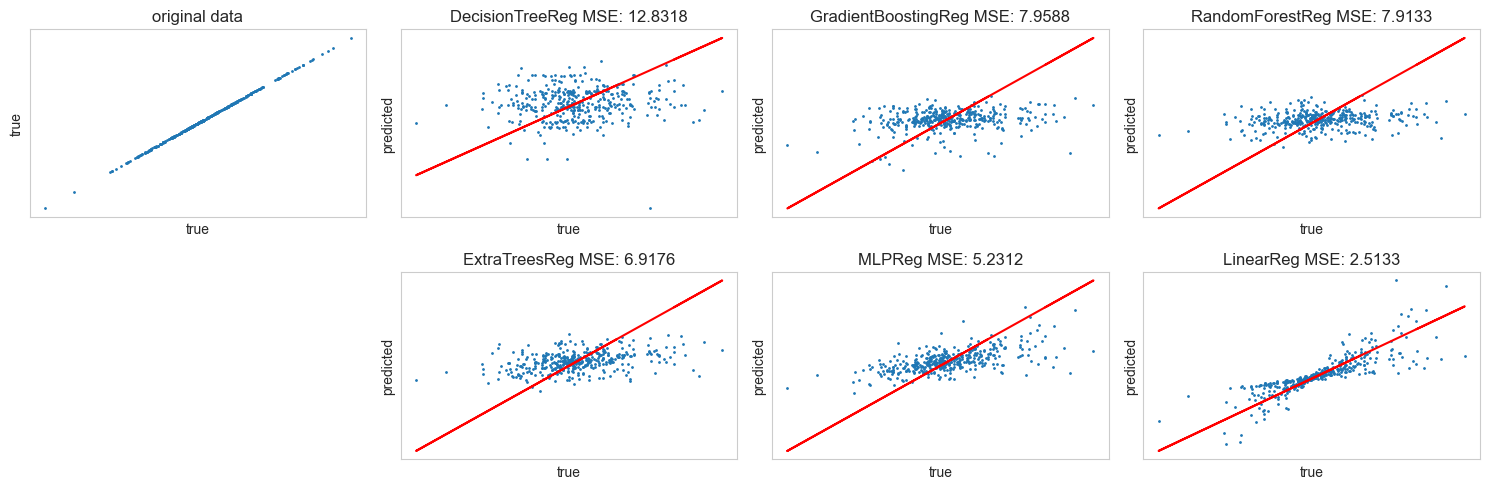

In [153]:
# Create a grid of pie charts
fig, axs = plt.subplots(2, 4, figsize=(15, 5))

# Flatten the axis array for easy iteration
axs = axs.ravel('A')

axs[0].scatter(labels_test, labels_test, s=1)
axs[0].set_title('original data')
axs[0].set_xlabel('true')
axs[0].set_ylabel('true')
axs[0].set_xticks([])
axs[0].set_yticks([])

#fig.delaxes(axs[1])

for i, regressors_name in enumerate(df_metrics['Regressor'][::-1]):
  #axs[i].axis('equal')
  if i<3:
    axs[i+1].plot(labels_test, labels_test, 'r')
    axs[i+1].scatter(labels_test, labels_per_regressor[regressors_name], s=1)

    mse_value_per_regressor = round(df_metrics.loc[df_metrics['Regressor'] == regressors_name, 'MSE'].item(), 4)
    axs[i+1].set_title(regressors_name + ' MSE: ' + str(mse_value_per_regressor))
    axs[i+1].set_xlabel('true')
    axs[i+1].set_ylabel('predicted')
    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
  else:
    axs[i+2].plot(labels_test, labels_test, 'r')
    axs[i+2].scatter(labels_test, labels_per_regressor[regressors_name], s=1)

    mse_value_per_regressor = df_metrics.loc[df_metrics['Regressor'] == regressors_name, 'MSE'].item()
    axs[i+2].set_title(regressors_name + ' MSE: ' + str(mse_value_per_regressor))
    axs[i+2].set_xlabel('true')
    axs[i+2].set_ylabel('predicted')
    axs[i+2].set_xticks([])
    axs[i+2].set_yticks([])

fig.delaxes(axs[4])

plt.tight_layout()

# Chart bar for $MSE$, $MAE$, $RSE$ and $RAE$

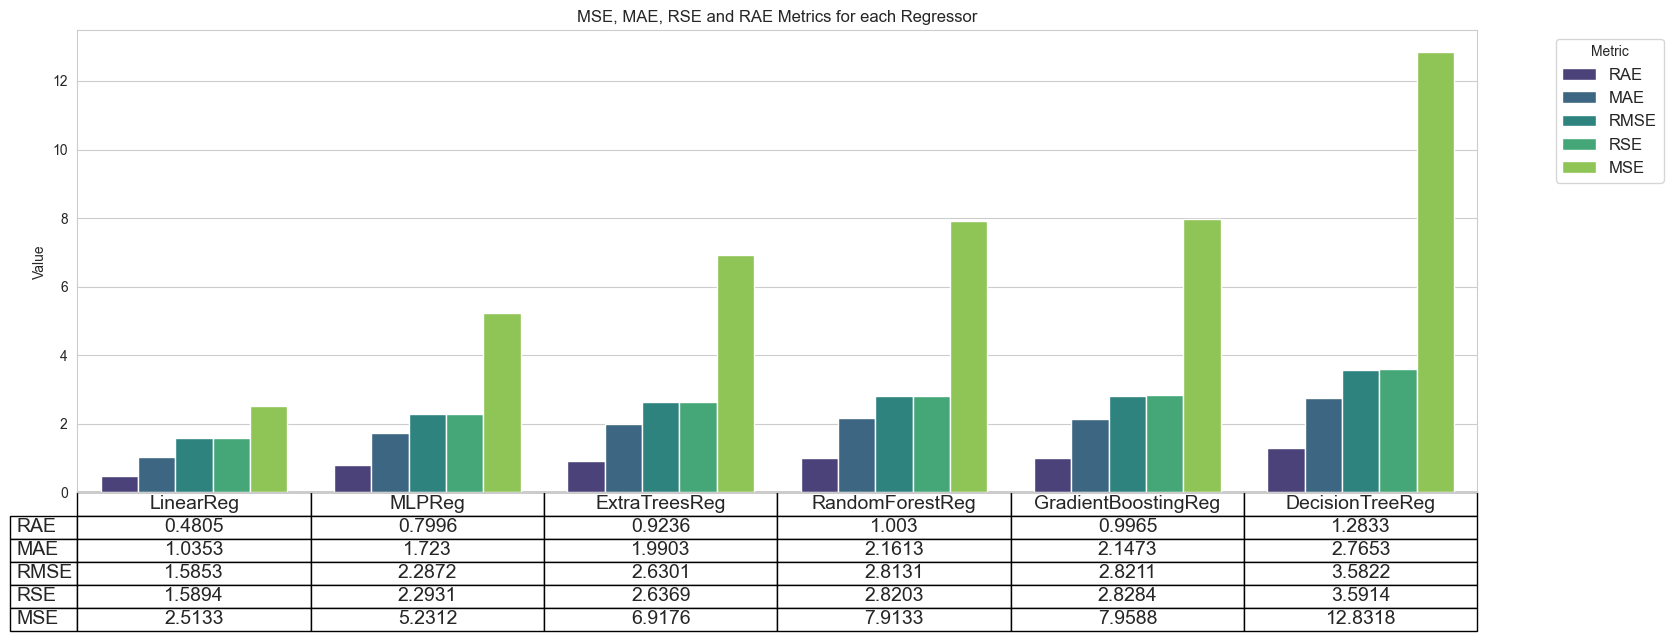

In [157]:
df = df_metrics.copy()
df.drop(columns=['R','R2'], inplace=True)

# Reshape the dataframe to a long format for plotting
df_long = df.melt(id_vars='Regressor', var_name='Metric', value_name='Value')

# Plot the bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x='Regressor', y='Value', hue='Metric', data=df_long, palette='viridis')

plt.title('MSE, MAE, RSE and RAE Metrics for each Regressor')
plt.xlabel('')
plt.ylabel('Value')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks([])

# Transpose the dataframe for the table
df_transposed = df.set_index('Regressor').T

# Add table below the chart
cell_text = df_transposed.values.tolist()
rows = df_transposed.index.tolist()
columns = df['Regressor'].tolist()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom',
                      fontsize=12)

# Increase the font size and padding for the table manually
for key, cell in the_table.get_celld().items():
    cell.set_fontsize(30)  # Set the desired font size
    cell.set_height(0.05)  # Increase cell height for more inner space
    #cell.set_width(0.1)    # Increase cell width for more inner space


# Adjust layout to make room for the table
#plt.subplots_adjust(left=0.2, bottom=0.3)
plt.subplots_adjust(left=0.2)

# Show the plot
plt.show()

# Chart bar for $R^2$ and $R$ metrics

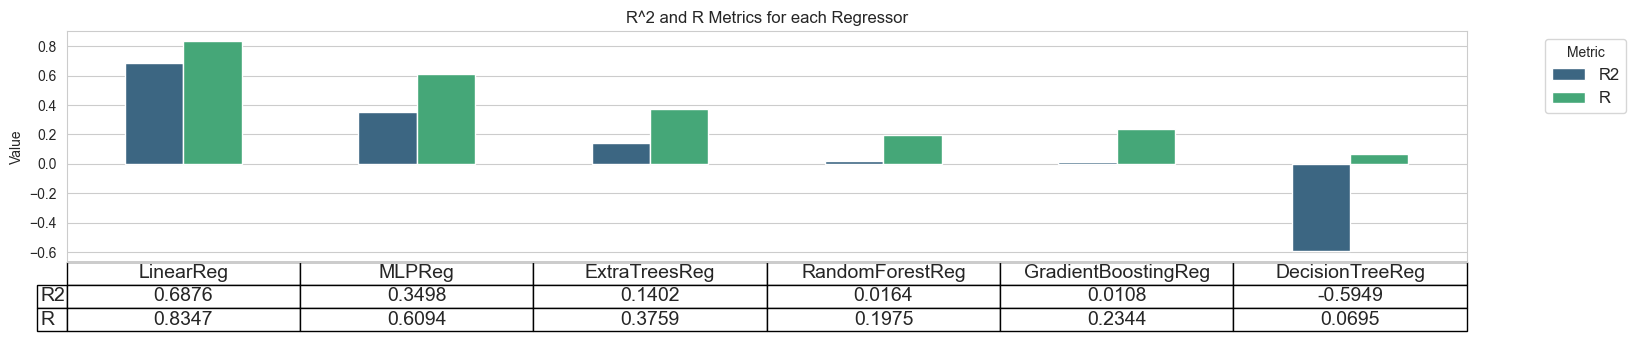

In [158]:
df = df_metrics[['Regressor', 'R2', 'R']].copy()
#df.drop(columns=['R2'], inplace=True)

# Reshape the dataframe to a long format for plotting
df_long = df.melt(id_vars='Regressor', var_name='Metric', value_name='Value')

# Plot the bar chart
plt.figure(figsize=(20, 3))
sns.barplot(x='Regressor', y='Value', hue='Metric', data=df_long, palette='viridis', width=.5)

plt.title('R^2 and R Metrics for each Regressor')
plt.xlabel('')
plt.ylabel('Value')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks([])

# Transpose the dataframe for the table
df_transposed = df.set_index('Regressor').T

# Add table below the chart
cell_text = df_transposed.values.tolist()
rows = df_transposed.index.tolist()
columns = df['Regressor'].tolist()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom',
                      fontsize=12)

# Increase the font size and padding for the table manually
for key, cell in the_table.get_celld().items():
    cell.set_fontsize(30)  # Set the desired font size
    cell.set_height(0.1)  # Increase cell height for more inner space
    #cell.set_width(0.1)    # Increase cell width for more inner space


# Adjust layout to make room for the table
#plt.subplots_adjust(left=0.2, bottom=0.3)
plt.subplots_adjust(left=0.2)

# Show the plot
plt.show()

# Plot for the predicts vs actual for every Stock

In [227]:
dow_jones_index.data.features

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,54,0.594786


In [260]:
df = dow_jones_index.data.features
df_date = df[['quarter', 'date']].copy()
df_date = df_date[df_date['quarter'] == 2].copy()
df_date.reset_index(drop=True, inplace=True)
df_date['date'] = pd.to_datetime(df_date['date'])
#df_date['date'] = df['date'].dt.strftime('%m-%d')
#df_date['stock'] = df_test['stock'].copy()
df_date['date'] = df_date['date'].dt.strftime('%m, %d')
df_date.drop(columns=['quarter'], inplace=True)
df_date

#df_date = df_test['stock']

,date
0,"04, 01"
1,"04, 08"
2,"04, 15"
3,"04, 21"
4,"04, 29"
...,...
385,"05, 27"
386,"06, 03"
387,"06, 10"
388,"06, 17"


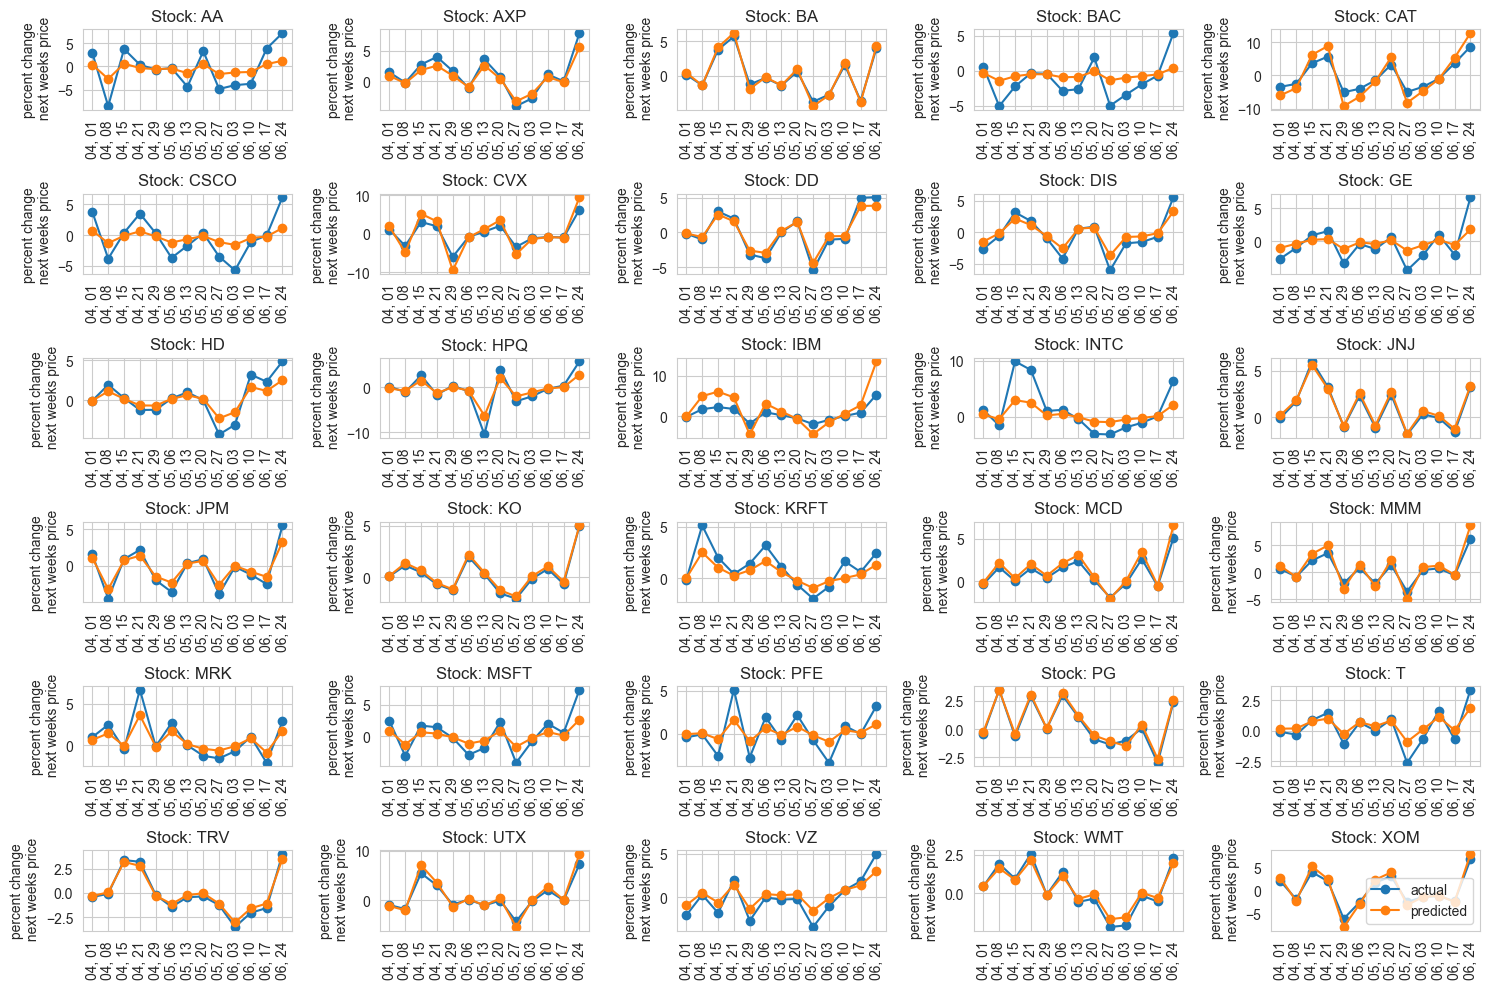

In [262]:
# Create a grid of pie charts
fig, axs = plt.subplots(6, 5, figsize=(15, 10))

# Flatten the axis array for easy iteration
axs = axs.ravel()

for i in list(df_test['stock'].unique()):
    #axs[i].axis('equal')
    axs[i].plot(df_date.iloc[df_test[df_test['stock'] == i].index]['date'],
                labels_test[df_test[df_test['stock'] == i].index], '-o', label = 'actual')
    axs[i].plot(df_date.iloc[df_test[df_test['stock'] == i].index]['date'],
                labels_per_regressor['LinearReg'][df_test[df_test['stock'] == i].index], '-o', label = 'predicted')
    #axs[i].plot(labels_per_regressor['LinearReg'][df_test[df_test['stock'] == i].index], '-o', label = 'predicted')
    #axs[i].plot(labels_test[df_test[df_test['stock'] == i].index])
    #axs[i].scatter(labels_test, labels_per_regressor[regressors_name], s=1)
    
    axs[i].set_title('Stock: ' + le.inverse_transform([i])[0])
    #axs[i].set_xlabel('true')
    axs[i].set_ylabel('percent change' + '\n' +' next weeks price')
    #axs[i].set_xticks([])
    #axs[i].set_yticks([])
    
    for label in axs[i].get_xticklabels():
        label.set_rotation(90)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()